In [1]:
!pip install fredapi

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
from fredapi import Fred

In [4]:
#Create the fred object
fred_key = '348f0a1dc7f82e15357c62d8171c321f'
fred = Fred(api_key=fred_key)

In [5]:
#search for economic data
sp_search = fred.search("S&P", order_by="popularity")
sp_search

id realtime_start realtime_end   
series id                                                        
BAMLH0A0HYM2          BAMLH0A0HYM2     2023-09-12   2023-09-12  \
CSUSHPINSA              CSUSHPINSA     2023-09-12   2023-09-12   
MEHOINUSA672N        MEHOINUSA672N     2023-09-12   2023-09-12   
BAMLH0A0HYM2EY      BAMLH0A0HYM2EY     2023-09-12   2023-09-12   
SP500                        SP500     2023-09-12   2023-09-12   
...                            ...            ...          ...   
DDEM01ILA156NWDB  DDEM01ILA156NWDB     2023-09-12   2023-09-12   
DDEM01JOA156NWDB  DDEM01JOA156NWDB     2023-09-12   2023-09-12   
DDEM01PGA156NWDB  DDEM01PGA156NWDB     2023-09-12   2023-09-12   
DDEM01QAA156NWDB  DDEM01QAA156NWDB     2023-09-12   2023-09-12   
DDEM01TTA156NWDB  DDEM01TTA156NWDB     2023-09-12   2023-09-12   

                                                              title   
series id                                                             
BAMLH0A0HYM2      ICE BofA US High Yield Index Option-Adjusted S...  \
CSUSHPINSA          S&P/Case-Shiller U.S. National Home Price Index   
MEHOINUSA672N     Real Median Household Income in the United States   
BAMLH0A0HYM2EY         ICE BofA US High Yield Index Effective Yield   
SP500                                                       S&P 500   
...                                                             ...   
DDEM01ILA156NWDB  Stock Market Turnover Ratio (Value Traded/Capi...   
DDEM01JOA156NWDB  Stock Market Turnover Ratio (Value Traded/Capi...   
DDEM01PGA156NWDB  Stock Market Turnover Ratio (Value Traded/Capi...   
DDEM01QAA156NWDB  Stock Market Turnover Ratio (Value Traded/Capi...   
DDEM01TTA156NWDB  Stock Market Turnover Ratio (Value Traded/Capi...   

                 observation_start observation_end     frequency   
series id                                                          
BAMLH0A0HYM2            1996-12-31      2023-09-11  Daily, Close  \
CSUSHPINSA              1987-01-01      2023-06-01       Monthly   
MEHOINUSA672N           1984-01-01      2022-01-01        Annual   
BAMLH0A0HYM2EY          1996-12-31      2023-09-11  Daily, Close   
SP500                   2013-09-12      2023-09-11  Daily, Close   
...                            ...             ...           ...   
DDEM01ILA156NWDB        1995-01-01      2020-01-01        Annual   
DDEM01JOA156NWDB        2007-01-01      2020-01-01        Annual   
DDEM01PGA156NWDB        2003-01-01      2017-01-01        Annual   
DDEM01QAA156NWDB        2007-01-01      2020-01-01        Annual   
DDEM01TTA156NWDB        2000-01-01      2001-01-01        Annual   

                 frequency_short                           units   
series id                                                          
BAMLH0A0HYM2                   D                         Percent  \
CSUSHPINSA                     M              Index Jan 2000=100   
MEHOINUSA672N                  A  2021 CPI-U-RS Adjusted Dollars   
BAMLH0A0HYM2EY                 D                         Percent   
SP500                          D                           Index   
...                          ...                             ...   
DDEM01ILA156NWDB               A                         Percent   
DDEM01JOA156NWDB               A                         Percent   
DDEM01PGA156NWDB               A                         Percent   
DDEM01QAA156NWDB               A                         Percent   
DDEM01TTA156NWDB               A                         Percent   

                               units_short      seasonal_adjustment   
series id                                                             
BAMLH0A0HYM2                             %  Not Seasonally Adjusted  \
CSUSHPINSA              Index Jan 2000=100  Not Seasonally Adjusted   
MEHOINUSA672N     2021 CPI-U-RS Adjusted $  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                           %  Not Seasonally Adjusted   
SP500                                Index  Not Seaso

In [6]:
#pull raw data & plot
sp500= fred.get_series(series_id="SP500")

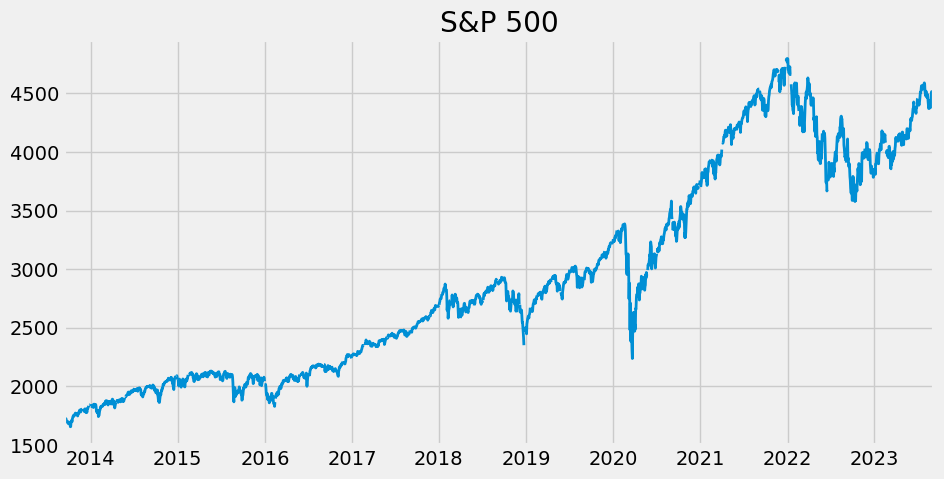

In [7]:
sp500.plot(figsize=(10, 5), title="S&P 500", lw=2)
plt.show()

In [8]:
#Pull and Join Multiple Data Series

unemp_df = fred.search("unemployment rate state", filter=("frequency", "Monthly"))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]



In [15]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
uemp_results = pd.concat(all_results, axis=1)


In [16]:
cols_to_drop = []
for i in uemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
uemp_results = uemp_results.drop(columns = cols_to_drop, axis=1)

In [17]:
uemp_states = uemp_results.copy()  #.drop('UNRATE', axis=1)
uemp_states = uemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [18]:
# Plot States Unemployment Rate
px.line(uemp_states)

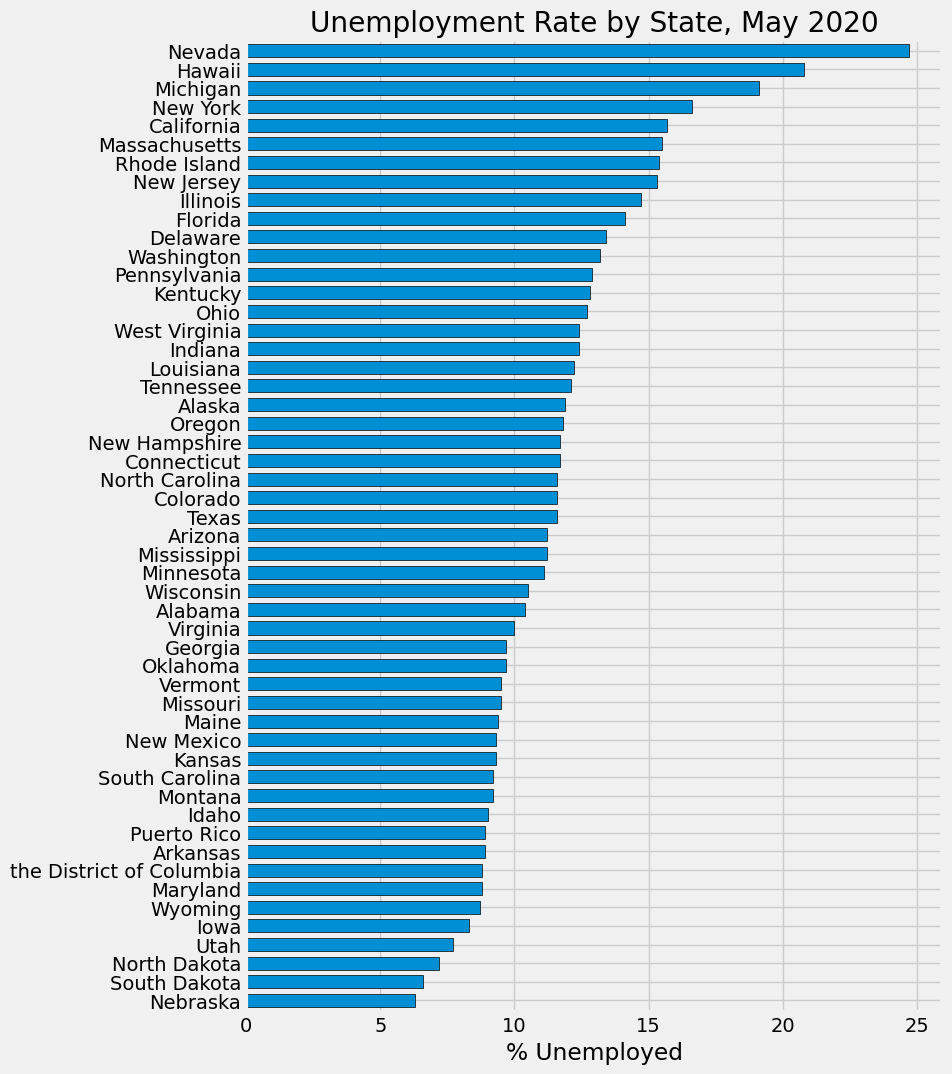

In [19]:
#Pull April 2020 Unemployment Rate Per State
ax = uemp_states.loc[uemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black',
          title='Unemployment Rate by State, May 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

In [20]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [21]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

In [22]:
# Plot Unemployment vs Participation for each state!
# Fix DC
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

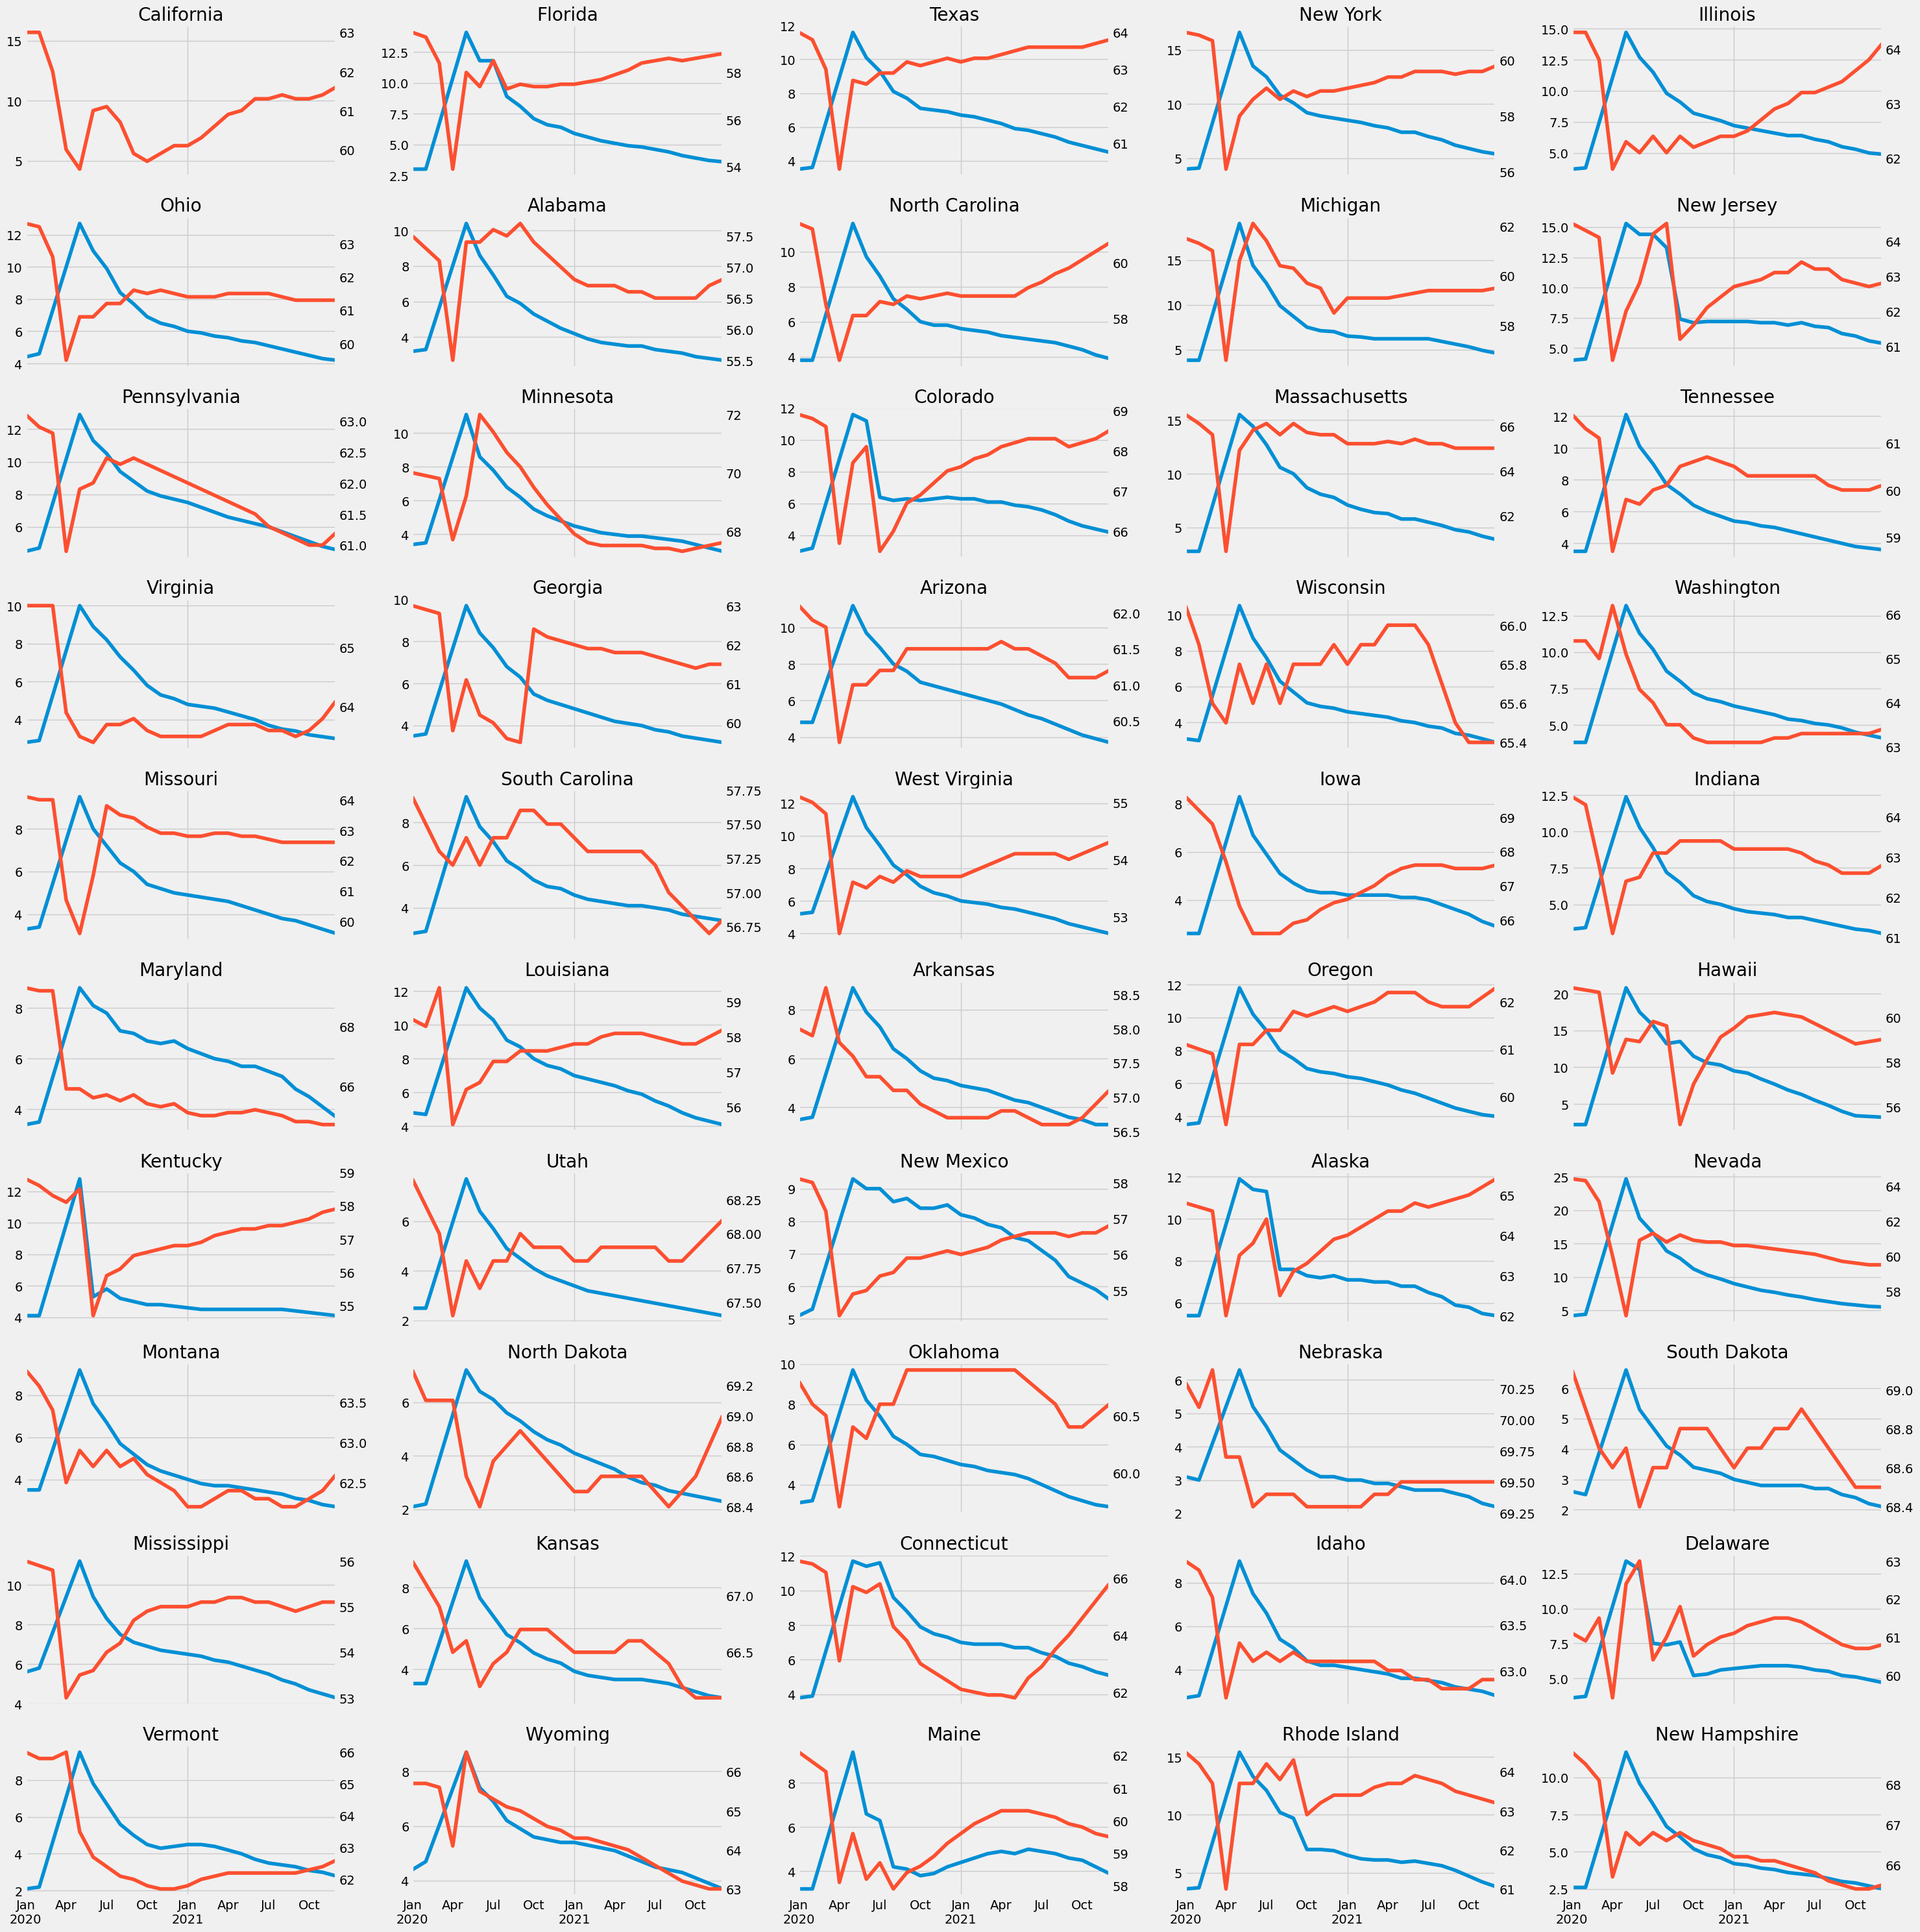

In [23]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

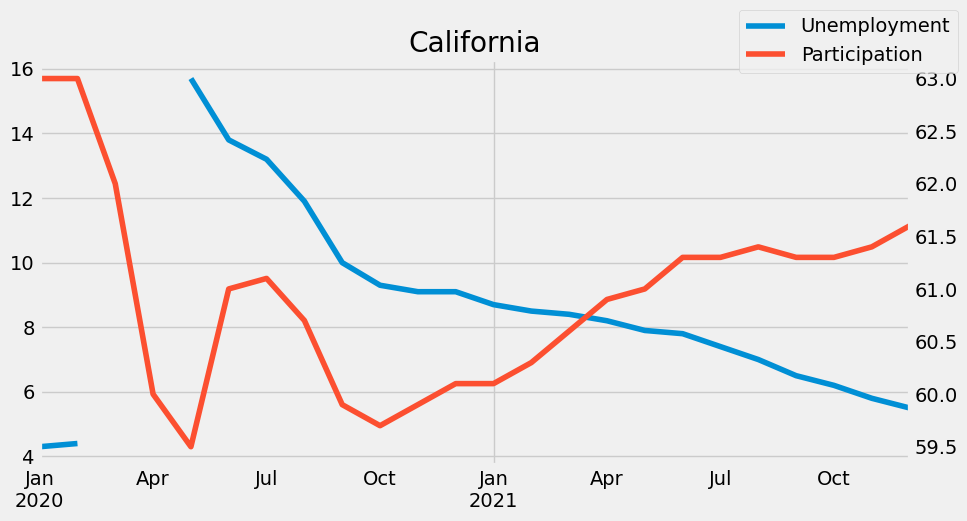

In [24]:
state = 'California'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
uemp_states2 = uemp_states.asfreq('MS')
l1 = uemp_states2.query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax, label='Unemployment')
l2 = part_states.dropna().query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()